# Import Data from url

# Import and store the data in a data frame

In [1]:
import pandas as pd
import numpy as np

In [2]:
names_list=['City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share_ML','Average fare','Low price airline','market share_LP','price']
air=pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',names=names_list,delim_whitespace=True)

In [3]:
air.head()
#Renamed market share by connecting it with respective columns as market share_ML(market leading) and market share_LP(low Prise)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share_ML,Average fare,Low price airline,market share_LP,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Remove the outliers from the data

In [15]:
#Removing the outliers from data

In [4]:
Q1=air['Average Fare'].quantile(0.25)
Q3=air['Average Fare'].quantile(0.75)
IQR=Q3-Q1
min_cap=Q1 - 1.5 * IQR
max_cap=Q3 + 1.5 * IQR
print(min_cap,max_cap)

18.84875000000001 304.51874999999995


In [5]:
air=air[[all([a,b]) for a,b in zip(air['Average Fare']>min_cap, air['Average Fare']<max_cap)]]
air.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share_ML,Average fare,Low price airline,market share_LP,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# Seperating dependent and independent variable

In [7]:
X=air[['City1','City2','Distance','Average weekly passengers','market leading airline','market share_ML','Average fare','Low price airline','market share_LP','price']]

In [8]:
Y=air[['Average Fare']]

# Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [9]:
air.corr()

,Average Fare,Distance,Average weekly passengers,market share_ML,Average fare,market share_LP,price
Average Fare,1.000000,0.549345,-0.181844,-0.223965,0.980923,-0.466366,0.863244
Distance,0.549345,1.000000,-0.124908,-0.530455,0.523250,-0.363031,0.551148
Average weekly passengers,-0.181844,-0.124908,1.000000,-0.053690,-0.162596,0.041018,-0.203205
market share_ML,-0.223965,-0.530455,-0.053690,1.000000,-0.209539,0.305621,-0.300354
Average fare,0.980923,0.523250,-0.162596,-0.209539,1.000000,-0.489843,0.822283
market share_LP,-0.466366,-0.363031,0.041018,0.305621,-0.489843,1.000000,-0.237469
price,0.863244,0.551148,-0.203205,-0.300354,0.822283,-0.237469,1.000000


In [ ]:
#Dropping the columns Average weekly passengers,market share_ML,market share_LP as correlation with dependent variable


In [17]:
air=air[['Distance','Average fare','price','Average Fare']]
air.head()


,Distance,Average fare,price,Average Fare
0,528,111.03,111.03,114.47
1,860,123.09,118.94,122.47
2,852,223.98,167.12,214.42
3,288,68.86,68.86,69.40
4,723,161.36,145.42,158.13


# creating a scatter plot

C:\Users\admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


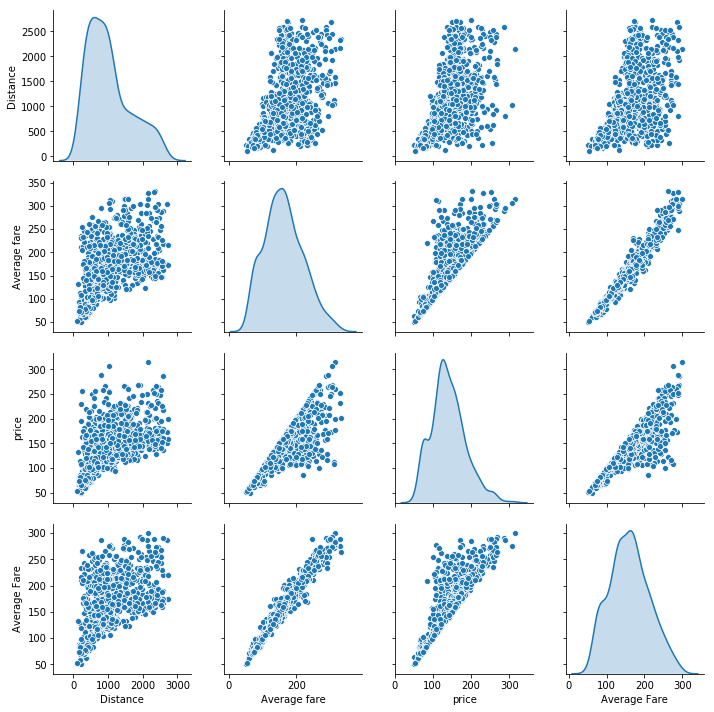

In [19]:
import seaborn as sns
sns.pairplot( air , diag_kind='kde')

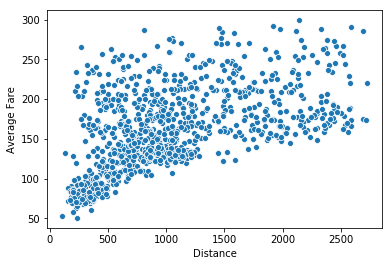

In [30]:
sns.scatterplot(air['Distance'],air['Average Fare'])

# Divide the data set into training and test data set and build a Multiple Linear Regression model.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
X=air[['Distance','Average fare','price']]
Y=air['Average Fare']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(689, 3) (689,) (296, 3) (296,)


In [37]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(689, 3) (296, 3) (689, 1) (296, 1)


In [38]:
linearreg=LinearRegression()

In [39]:
model=linearreg.fit(x_train,y_train)

# Print the coefficients & intercepts of the linear regression model

In [40]:
coedf=pd.DataFrame(model.coef_,index=['coefficient'],columns=X.columns)
coedf

,Distance,Average fare,price
coefficient,0.00182,0.749823,0.191133


In [41]:
model.intercept_

array([9.13302758])

# accuracy of the overall model

In [42]:
model.score(x_train,y_train)

0.9720359281155355

In [43]:
model.score(x_test,y_test)

0.973181064462666